In [4]:
import cPickle, glob, h5py, os, string, matplotlib
#matplotlib.use('Agg')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from imp import reload

from oc_ica import gabor_fit, plotting, analysis, styles
from oc_ica.analysis import compute_angles

# Figure 1

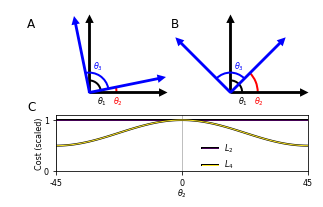

In [2]:
reload(plotting)
plotting.plot_figure1('/home/jesse/Downloads/figure1.pdf')

# Figure 2

Overcomplete ICA
Degeneracy control: L2
ICA with L-BFGS-B done!
Final loss value: 64.0000076294
Overcomplete ICA
Degeneracy control: L4
ICA with L-BFGS-B done!
Final loss value: 0.276515573263
Overcomplete ICA
Degeneracy control: COULOMB
ICA with L-BFGS-B done!
Final loss value: 63.4722114586
Overcomplete ICA
Degeneracy control: RANDOM
ICA with L-BFGS-B done!
Final loss value: 127.291476326
Overcomplete ICA
Degeneracy control: L2
ICA with L-BFGS-B done!
Final loss value: 64.0
Overcomplete ICA
Degeneracy control: L4
ICA with L-BFGS-B done!
Final loss value: 0.275001555681
Overcomplete ICA
Degeneracy control: COULOMB
ICA with L-BFGS-B done!
Final loss value: 63.4721123957
Overcomplete ICA
Degeneracy control: RANDOM
ICA with L-BFGS-B done!
Final loss value: 127.293582881
Overcomplete ICA
Degeneracy control: L2
ICA with L-BFGS-B done!
Final loss value: 64.0000762939
Overcomplete ICA
Degeneracy control: L4
ICA with L-BFGS-B done!
Final loss value: 0.274383813143
Overcomplete ICA
Degeneracy 

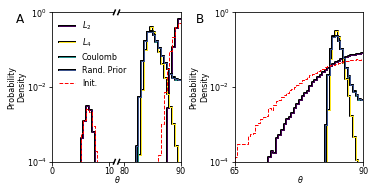

In [3]:
reload(plotting)
plotting.plot_figure2('/home/jesse/Downloads/figure2.pdf', n_iter=10)

# Figure 3

In [5]:
f_name = ('/home/jesse/Development/results/oc_ica/data_free_sources-32/' +
        'data_free-32_sources-96_ocs-1.0_1.125_1.25_1.5_1.75_2.0_2.5_3.0' +
        '_models-2_4_RANDOM_RANDOM_F_COULOMB_COULOMB_F.h5')

with h5py.File(f_name) as f:
    print f.keys()
    W_fits = f['W_fits'].value
    W_orig = f['W_orig'].value
    models = f['models'].value
    ocs = f['ocs'].value
_, _, n_iter, _, n_mixtures = W_fits.shape

min_coherence = np.zeros((len(models), len(ocs), n_iter))

for ii, model in enumerate(models):
    for jj, oc in enumerate(ocs):
        for kk in range(n_iter):
            n_sources = int(float(oc) * n_mixtures)
            min_coherence[ii, jj, kk] = compute_angles(W_fits[ii, jj, kk, :n_sources]).min()

[u'W_fits', u'W_orig', u'models', u'ocs']


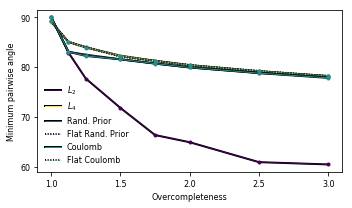

In [6]:
f, ax = plt.subplots(1, figsize=(5, 3))
x = [float(y) for y in ocs]
for ii, model in enumerate(models):
#    if model in ['2', '4', 'COULOMB']:
        ax.plot(x, np.median(min_coherence[ii, :], axis=-1), styles.line_styles[model],
                label=styles.labels[model], c = styles.colors[model], lw=styles.lw,
               path_effects=[pe.Stroke(linewidth=styles.lw+1, foreground='k'), pe.Normal()])
        ax.plot(x, np.median(min_coherence[ii, :], axis=-1), '.',
                c = styles.colors[model])
ax.set_xlabel('Overcompleteness', fontsize=styles.label_fontsize)
ax.set_ylabel('Minimum pairwise angle', fontsize=styles.label_fontsize)
ax.set_yticks([60, 70, 80, 90])
ax.set_xticks([1, 1.5, 2, 2.5, 3])
ax.tick_params(labelsize=styles.ticklabel_fontsize)
ax.legend(frameon=False, fontsize=styles.legend_fontsize)
f.tight_layout()
#ax.set_yscale('log')
plt.savefig('/home/jesse/Downloads/appendix1.pdf')
plt.show()